# Exploratory Data Analysis (EDA)

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
customers_path = "Customers.csv"
products_path = "Products.csv"
transactions_path = "Transactions.csv"

customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

# Merge datasets
customer_transactions = pd.merge(transactions_df, customers_df, on="CustomerID", how="inner")
full_data = pd.merge(customer_transactions, products_df, on="ProductID", how="inner")

# Display dataset summaries
print(customers_df.info())
print(products_df.info())
print(transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

## Data Cleaning and Initial Exploration

In [2]:

# Checking for duplicates
print("Duplicate records:")
print("Customers:", customers_df.duplicated().sum())
print("Products:", products_df.duplicated().sum())
print("Transactions:", transactions_df.duplicated().sum())

# Summary statistics of the merged dataset
full_data.describe()


Duplicate records:
Customers: 0
Products: 0
Transactions: 0


,TransactionDate,Quantity,TotalValue,Price_x,SignupDate,Price_y
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,497.76000
std,NaN,1.117981,493.144478,140.73639,NaN,140.73639


## Visualizations and Insights

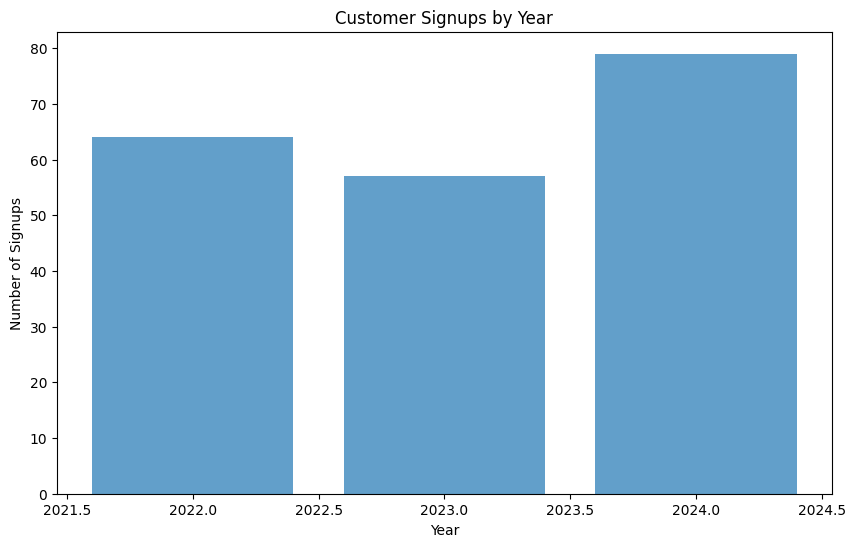

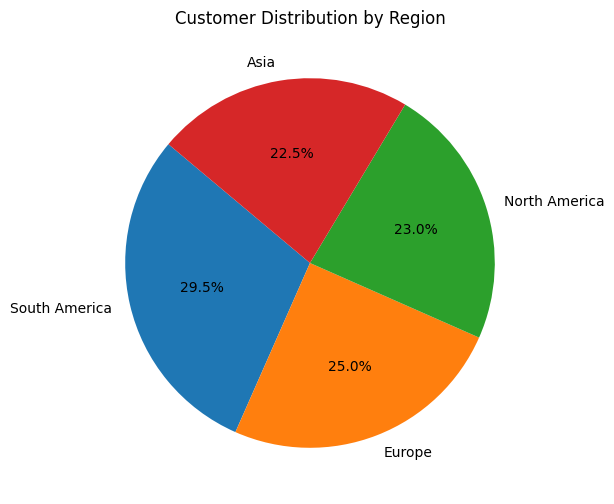

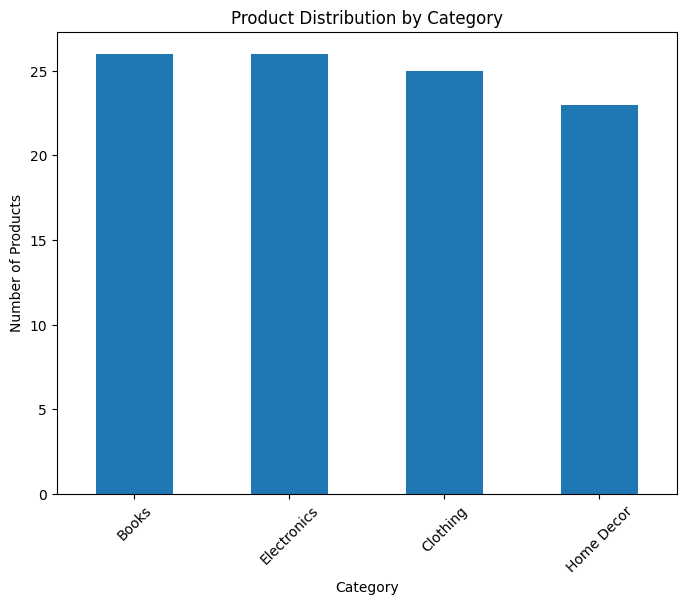

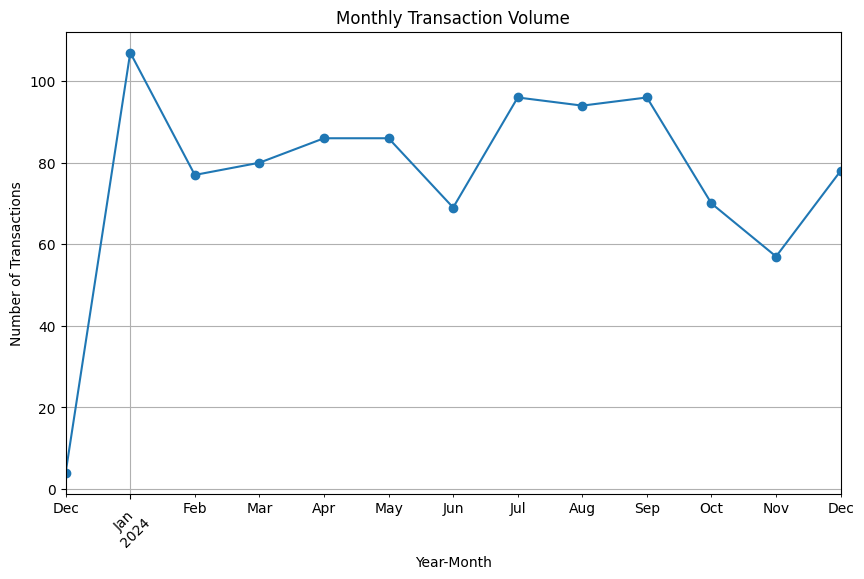

In [3]:

# 1. Customer Signup Trends
signup_trends = customers_df['SignupDate'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(signup_trends.index, signup_trends.values, alpha=0.7)
plt.title("Customer Signups by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

# 2. Region-wise Customer Distribution
region_distribution = customers_df['Region'].value_counts()

plt.figure(figsize=(8, 6))
region_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Customer Distribution by Region")
plt.ylabel("")  # Hide y-axis label for pie chart
plt.show()

# 3. Product Category Distribution
category_distribution = products_df['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_distribution.plot(kind='bar')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

# 4. Sales Trends: Transaction Volume Over Time
transactions_df['TransactionYearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
sales_trends = transactions_df['TransactionYearMonth'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sales_trends.plot(kind='line', marker='o')
plt.title("Monthly Transaction Volume")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Derived Insights

In [4]:

# 1. Top Regions by Total Revenue
region_revenue = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# 2. Top Product Categories by Revenue
category_revenue = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# 3. Most Profitable Products
product_revenue = full_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)

# 4. Customer Lifetime Value (CLV)
customer_clv = full_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)

# 5. Average Order Value (AOV) by Region
region_aov = full_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Displaying the results
print("Top Regions by Revenue:")
print(region_revenue)
print("\nTop Product Categories by Revenue:")
print(category_revenue)
print("\nMost Profitable Products:")
print(product_revenue)
print("\nTop Customers by Lifetime Value:")
print(customer_clv)
print("\nAverage Order Value by Region:")
print(region_aov)


Top Regions by Revenue:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

Top Product Categories by Revenue:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

Most Profitable Products:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64

Top Customers by Lifetime Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64

Average Order Value by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64
